In [1]:
import os

# Plots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from sklearn.metrics import accuracy_score

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Utils
from tqdm import tqdm, trange

## Utils

# Pytorch API

Package| 	Description|
-|-|
`torch`| 	The top-level PyTorch package and tensor library.
`torch.nn`| 	A subpackage that contains modules and extensible classes for building neural networks.
`torch.autograd`| 	A subpackage that supports all the differentiable Tensor operations in PyTorch.
`torch.nn.functional`| 	A functional interface that contains typical operations used for building neural networks like loss functions, activation functions, and convolution operations.
`torch.optim`| 	A subpackage that contains standard optimization operations like SGD and Adam.
`torch.utils`| 	A subpackage that contains utility classes like data sets and data loaders that make data preprocessing easier.
`torchvision`| 	A package that provides access to popular datasets, model architectures, and image transformations for computer vision. 

# Tensors

## Tensor introduction

To get started with deep learning, we will need to develop a few basic skills. All machine learning is concerned with extracting information from data. So we will begin by learning the practical skills for storing and manipulating data.

To start, we introduce the 𝑛-dimensional array, which is also called the tensor. No matter which framework we use, its tensor class (Tensor in both PyTorch and TensorFlow) is similar to numpy's ndarray with a few useful features. First, GPU is well-supported to accelerate the computation, whereas numpy only supports CPU computation. Second, the tensor class supports automatic differentiation. These properties make the tensor class suitable for deep learning.

Each of these examples are specific instances of the more general concept of a tensor:
- number / scalar
- array / vector
- 2d-array / matrix

Tensors are generalizations: $n$d-arrays

In [2]:
x = torch.tensor([1, 2, 3])
x

tensor([1, 2, 3])

In [3]:
# Dtypes
x = torch.tensor([1, 2, 3], dtype=torch.float32)
x

tensor([1., 2., 3.])

In [4]:
x = torch.tensor(2)
x

tensor(2)

In [5]:
# item returns a value in a standard 
x.item(), type(x.item())

(2, int)

### Get information about a tensor

In [6]:
print(f"Shape of tensor: {x.shape}")
print(f"Datatype of tensor: {x.dtype}")
print(f"Device tensor is stored on: {x.device}")

Shape of tensor: torch.Size([])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


### Creating tensors

Like in `numpy`, there are different functions that create tensors.

In [27]:
x = torch.arange(12, dtype=torch.float32)
print(x)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])


In [29]:
x = torch.tensor([1, 2, 3])
x = torch.repeat_interleave(x, 3) # Repeats each element 3 times
print(x)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])


In [11]:
x = torch.ones((2, 3))
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [13]:
x = torch.zeros((3, 3))
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [14]:
# Uniform random of a given shape
x = torch.rand((3, 3))
print(x)

tensor([[0.8735, 0.1078, 0.3134],
        [0.4201, 0.4748, 0.2952],
        [0.6682, 0.1136, 0.9417]])


In [15]:
# Normal random of a given shape
x = torch.randn((3, 3))
print(x)

tensor([[-0.1100,  0.6088, -1.0748],
        [ 1.5586,  0.3468, -0.3384],
        [-1.4755, -0.4404,  0.0695]])


In [40]:
# Normal distribution with given mean and std
x = torch.normal(mean = 10, std = 1, size = (2, 3))
print(x)

tensor([[ 8.0980, 11.0837, 10.1562],
        [12.2184, 12.0402,  8.9105]])


### Tensor operations

#### Matrix Operations

In [7]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

In [8]:
x.shape

torch.Size([2, 3])

In [9]:
print(x.sum())
print(x.sum(axis=0))
print(x.sum(axis=1))

tensor(21.)
tensor([5., 7., 9.])
tensor([ 6., 15.])


In [45]:
x = torch.ones((2, 2))
x * 2,  x / 2, x // 2, x + 2, torch.exp(x)

(tensor([[2., 2.],
         [2., 2.]]),
 tensor([[0.5000, 0.5000],
         [0.5000, 0.5000]]),
 tensor([[0., 0.],
         [0., 0.]]),
 tensor([[3., 3.],
         [3., 3.]]),
 tensor([[2.7183, 2.7183],
         [2.7183, 2.7183]]))

Matrix multiplication

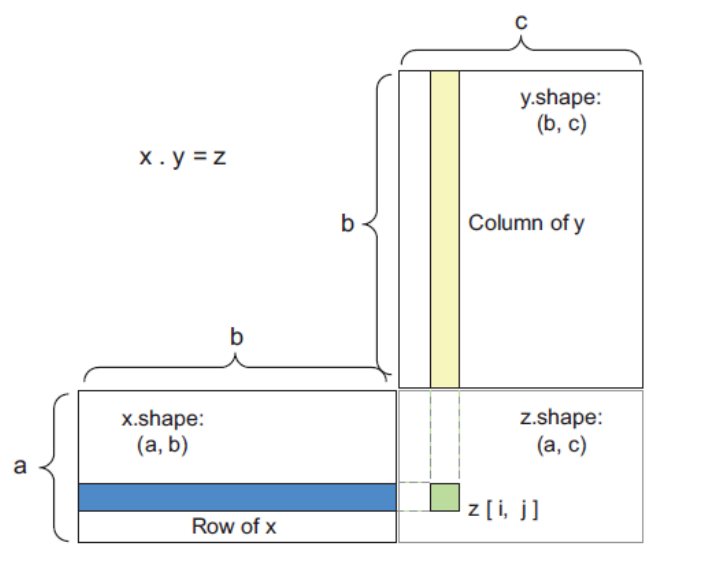

In [48]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
y = torch.ones((3, 2)) *2

print(x.shape, y.shape)
print(x.matmul(y))
print(x @ y)

torch.Size([2, 3]) torch.Size([3, 2])
tensor([[12., 12.],
        [30., 30.]])
tensor([[12., 12.],
        [30., 30.]])


In [49]:
# Elementwise multiplication
x * y.T

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

#### Reshape, squeeze, flatten

In [50]:
print(x)
print(x.reshape(3, 2))
print(x.flatten())

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([1., 2., 3., 4., 5., 6.])


In [51]:
print(x, x.shape)
print()
print(x.unsqueeze(0), x.unsqueeze(0).shape)

print(x.unsqueeze(-1), x.unsqueeze(-1).shape)

print(x.unsqueeze(1), x.unsqueeze(1).shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]]) torch.Size([2, 3])

tensor([[[1., 2., 3.],
         [4., 5., 6.]]]) torch.Size([1, 2, 3])
tensor([[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]]]) torch.Size([2, 3, 1])
tensor([[[1., 2., 3.]],

        [[4., 5., 6.]]]) torch.Size([2, 1, 3])


#### Reshape, squeeze, flatten - einops

In [75]:
from einops import rearrange, reduce, repeat


In [87]:
# Suppose we have 10 images of with 3 colors, height = 32, width = 24 => our tensors should be of shape (10, 3, 32, 24)
x = torch.rand((10, 3, 32, 24))
print(x.shape)
# Let's flatten the height and width into one dimension
res = rearrange(x, "b c h w -> b c (h w)")
print(res.shape)

# Let's flatten everything 
res = rearrange(x, "b c h w -> b (c w h)")
print(res.shape)

#Let's switch the height and width
res = rearrange(x, "b c h w -> b c w h")
print(res.shape)

# Let's unsqueeze in the middle somewhere
res = rearrange(x, "b c h w -> b 1 c 1 w h")
print(res.shape)

# Let's repeat all the channels again
res = repeat(x, "b c h w -> b (repeat c) h w", repeat = 2)
print(res.shape)

# Let's repeat all the channels again
res = reduce(x, "b c h w -> b h w", reduction = "sum")
print(res.shape)


torch.Size([10, 3, 32, 24])
torch.Size([10, 3, 768])
torch.Size([10, 2304])
torch.Size([10, 3, 24, 32])
torch.Size([10, 1, 3, 1, 24, 32])
torch.Size([10, 6, 32, 24])
torch.Size([10, 32, 24])


### Concatenation

In [52]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
y = torch.tensor([[10, 20, 30], [40, 50, 60]])

torch.cat([x, y], dim=0)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [10, 20, 30],
        [40, 50, 60]])

In [53]:
torch.cat([x, y], dim=1)

tensor([[ 1,  2,  3, 10, 20, 30],
        [ 4,  5,  6, 40, 50, 60]])

## Usual tensor dimensions used in practice

1. 2D - Numerical data (Vector data):
- `(num_samples, num_features)`
2. 3D - Time series: 
- `(num_samples, num_timesteps, num_features)`
3. 4D - Image data: 
- `(num_samples, height, width, channels)` or `(channels, num_samples, height, width)`
4. 5D - Video:
- `(num_samples, frames, height, width, channels)`



# Data

## Dataset, DataLoader

- https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.

In [54]:
from torch.utils.data import DataLoader, Dataset

In [55]:
class MyDataset(Dataset):
    def __init__(self):
        numbers = np.arange(100)
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

In [56]:
dataset = MyDataset()
print(len(dataset))
print(dataset.data)

100
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [65]:
batch_size = 8
trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset, batch_size=batch_size, shuffle = False)

In [70]:
next(iter(trainloader))

tensor([46, 24, 64,  3, 88, 12, 56, 86], dtype=torch.int32)

In [74]:
next(iter(testloader))

tensor([0, 1, 2, 3, 4, 5, 6, 7], dtype=torch.int32)

# Training

**Videos**
- [DeepLizard playlist](https://www.youtube.com/watch?v=gZmobeGL0Yg&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)
- [loss function](https://www.youtube.com/watch?v=QBbC3Cjsnjg)
- [Activation functions](https://www.youtube.com/watch?v=s-V7gKrsels)
- [Optimizers](https://www.youtube.com/watch?v=mdKjMPmcWjY)

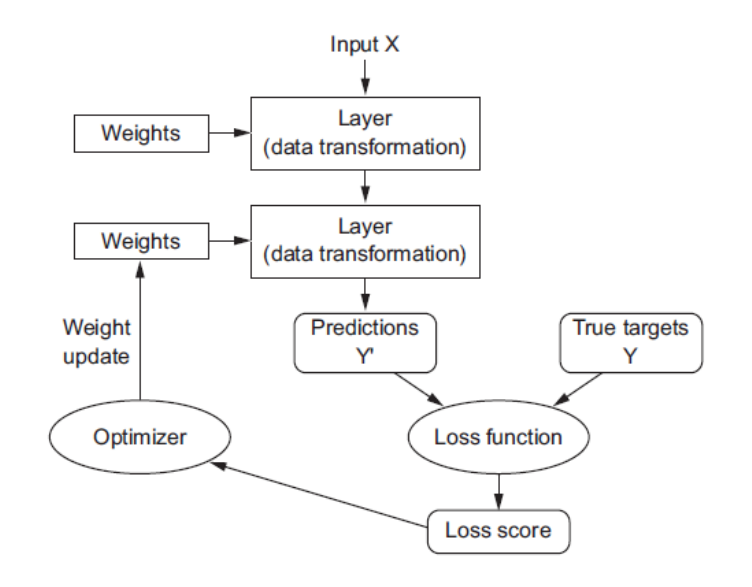

## Data

In [89]:
from einops import rearrange
from torchvision.datasets import MNIST
from torchvision import transforms

In [96]:
transform = transforms.Compose(
    [transforms.ToTensor()]
)
train_data = MNIST(
    root=os.path.join("..", "data", "tmp", "mnist"), download=True, train=True, transform = transform,
)
test_data = MNIST(
    root=os.path.join("..", "data", "tmp", "mnist"), download=True, train=False, transform = transform,
)

In [124]:
batch_size = 64
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_data, batch_size=batch_size, shuffle = False)

torch.Size([64, 1, 28, 28]) torch.Size([64])


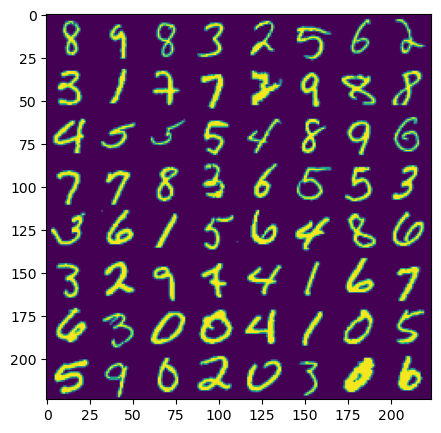

In [133]:
images, labels = next(iter(trainloader))

print(images.shape, labels.shape)

plt.figure(figsize = (5, 5))
plt.imshow(rearrange(images, "(b1 b2) 1 h w -> (b1 h) (b2 w)", b1=8, b2=8))
plt.show()

## Models

In [167]:
from torchinfo import summary


In [168]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [169]:
class Model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Model, self).__init__()
        # rearrange layer
        self.flatten = nn.Flatten()
        # Hidden layers
        self.fc = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        x = self.fc2(x)
        return F.softmax(x, dim=1)


# Make and use a stronger model

In [177]:
input_shape = 28 * 28 # linear dim
output_shape = 10 # 10 classes
model = Model(input_shape, output_shape)
model.to(device)

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [178]:
model

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [179]:
# See more details about the model, such as the number of parameters
summary(model)

Layer (type:depth-idx)                   Param #
Model                                    --
├─Flatten: 1-1                           --
├─Linear: 1-2                            100,480
├─Linear: 1-3                            1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0

In [180]:
# You can inspect the parameters manually here
for p in model.parameters():
    print(p.shape)
    # print(p)

torch.Size([128, 784])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


## Optimizers, loss

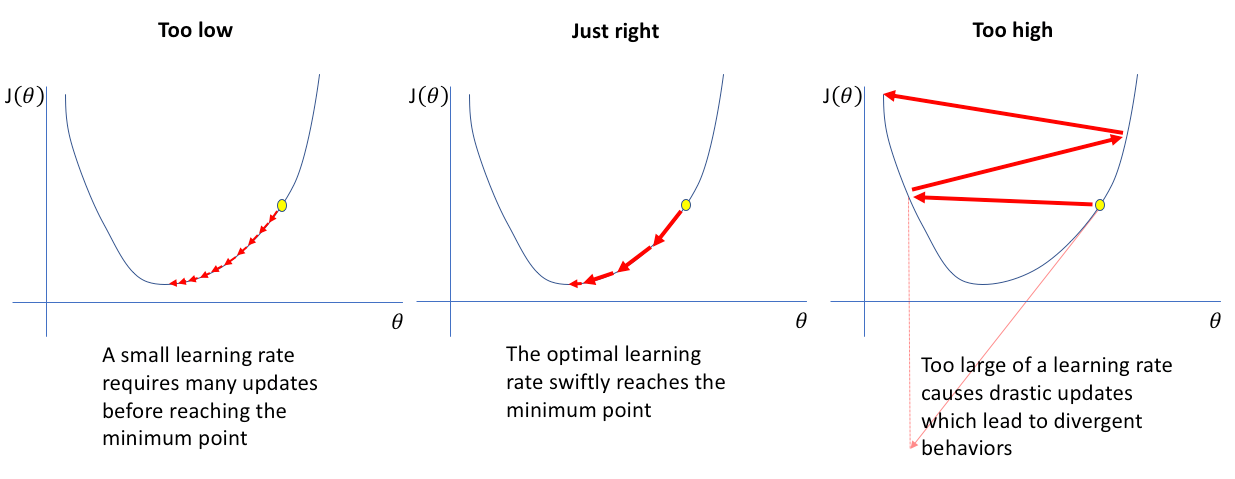

In [181]:
# The learning rate means how fast the model learns.
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# The loss function is dictated by the task and the output type. 
# In classification problems we usually use the CrossEntropy loss.
loss_function = nn.CrossEntropyLoss()

## Training

In [182]:
epochs = 5
accs = []
losses = []
model.train()  # Set the model to training mode
for epoch in (bar := trange(epochs)):
    loss_epoch = 0.0
    num_correct = 0
    for X_batch, y_batch in trainloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_pred = model(X_batch)

        loss = loss_function(y_pred, y_batch)
        
        # Collect info about the epoch
        loss_epoch += loss.item()
        num_correct += torch.sum(torch.argmax(y_pred, axis=1) == y_batch).item()

        # These lines do the "learning" part. 
        # The gradients represent how much you need to change the model
        # We zero them because they are kept after each optimization step and
        # we don't want them to accumulate each epochs
        optimizer.zero_grad()  
        # We propagate the error through the model
        loss.backward()
        # We adjust the weights
        optimizer.step()

    acc = num_correct / len(trainloader.dataset)
    loss_epoch /= len(trainloader.dataset)
    losses.append(loss_epoch)
    accs.append(acc)
    bar.set_description(f"Loss: {round(loss_epoch, 4), round(acc, 4)}")

Loss: (0.02, 0.92): 100%|████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.71s/it]


## Evaluate

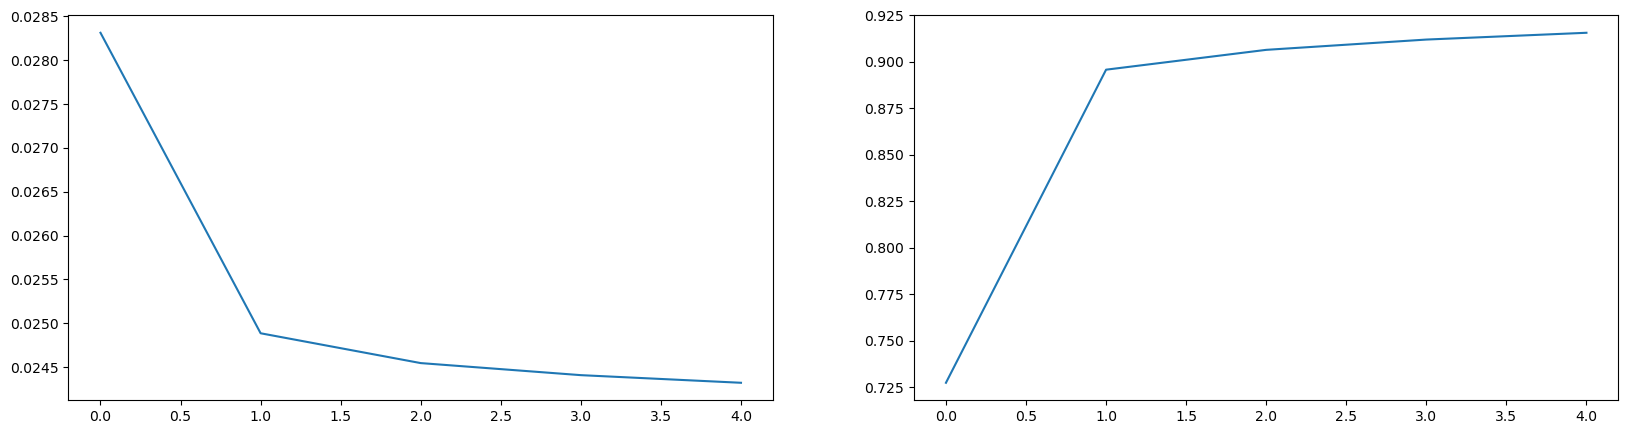

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(losses)
axs[1].plot(accs)

In [185]:
with torch.no_grad():
    model.eval()
    num_correct = 0
    for X_batch, y_batch in testloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        y_pred = model(X_batch)

        loss = loss_function(y_pred, y_batch)

        # Collect info about the epoch
        loss_epoch += loss.item()
        num_correct += torch.sum(torch.argmax(y_pred, axis=1) == y_batch).item()
    acc = num_correct / len(testloader.dataset)

print(f"test accuracy: {round(acc, 2)}")


test accuracy: 0.92


# Cuda

## Device 

In [186]:
torch.cuda.is_available()

True

In [187]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [188]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA GeForce GTX 970', major=5, minor=2, total_memory=4095MB, multi_processor_count=13)

In [189]:
torch.cuda.device_count()

1

## Memory

In [190]:
print(torch.cuda.memory_summary(abbreviated=True))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    2539 KB |    3113 KB |    6261 MB |    6258 MB |
|---------------------------------------------------------------------------|
| Active memory         |    2539 KB |    3113 KB |    6261 MB |    6258 MB |
|---------------------------------------------------------------------------|
| GPU reserved memory   |    4096 KB |    4096 KB |    4096 KB |       0 B  |
|---------------------------------------------------------------

In [23]:
def print_memory_stats(mb=True):
    d = 1
    if mb == True:
        d = 1024 * 1024

    t = torch.cuda.get_device_properties(0).total_memory / d
    r = torch.cuda.memory_reserved(0) / d
    a = torch.cuda.memory_allocated(0) / d
    f = r - a  # free inside reserved
    print(f"total memory: {t} MB")
    print(f"reserved memory: {r} MB")
    print(f"allocated memory: {a} MB")
    print(f"free memory inside reserved : {f} MB")
    # return t, r, a, f

In [24]:
# Look at memory
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB


In [25]:
x = torch.rand(1000000)
x, x.device

(tensor([0.4654, 0.2419, 0.1720,  ..., 0.9997, 0.0504, 0.7908]),
 device(type='cpu'))

In [26]:
# Put a tensor into gpu memory
x = x.cuda()
print(x.device)
print_memory_stats()

cuda:0
total memory: 4039.75 MB
reserved memory: 20.0 MB
allocated memory: 3.81494140625 MB
free memory inside reserved : 16.18505859375 MB


In [27]:
# Try to empty cache. It's the same since we have a reference to `x`
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 20.0 MB
allocated memory: 3.81494140625 MB
free memory inside reserved : 16.18505859375 MB


In [28]:
# Delete x and look at memory.
del x
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 20.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 20.0 MB


In [29]:
# Indeed, we can't acces `x` anymore
x

NameError: name 'x' is not defined

In [30]:
# Try to empty cache.
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB


In [31]:
torch.tensor([1, 2, 3]).cuda()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 2.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 2.0 MB


In [32]:
def pretty_size(size):
    """Pretty prints a torch.Size object"""
    assert isinstance(size, torch.Size)
    return " × ".join(map(str, size))


def dump_tensors(gpu_only=True, delete=True):
    """Prints a list of the Tensors being tracked by the garbage collector."""
    import gc

    total_size = 0
    for obj in gc.get_objects():  # Get objects in Garbage collector
        try:
            if torch.is_tensor(obj):  # If the object is a tensor
                if not gpu_only or obj.is_cuda:  # If it's on cuda
                    print(
                        f"{type(obj).__name__}: {' GPU' if obj.is_cuda else ''}{' pinned' if obj.is_pinned else ''} {pretty_size(obj.size())}"
                    )
                    total_size += obj.numel()
                    if delete:
                        del obj
            elif hasattr(obj, "data") and torch.is_tensor(
                obj.data
            ):  # If the object has data
                if not gpu_only or obj.is_cuda:  # If it's on cuda
                    # Print stuff about it
                    print(
                        "%s → %s:%s%s%s%s %s"
                        % (
                            type(obj).__name__,
                            type(obj.data).__name__,
                            " GPU" if obj.is_cuda else "",
                            " pinned" if obj.data.is_pinned else "",
                            " grad" if obj.requires_grad else "",
                            " volatile" if obj.volatile else "",
                            pretty_size(obj.data.size()),
                        )
                    )

                    total_size += obj.data.numel()
                    if delete:
                        del obj

        except Exception as e:
            pass
    if delete:
        torch.cuda.empty_cache()
    print("Total size:", total_size)

In [33]:
x = torch.rand((100, 100, 100)).cuda()
y = torch.rand((2134, 4444)).cuda()
dump_tensors()

Tensor:  GPU pinned 100 × 100 × 100
Tensor:  GPU pinned 2134 × 4444
Total size: 10483496


/home/zademn/.conda/envs/pytorch_env/lib/python3.9/site-packages/torch/distributed/distributed_c10d.py:170: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


In [34]:
del x, y

In [35]:
dump_tensors()

Total size: 0


## GPU to CPU

In [36]:
x = torch.rand((100, 100, 100)).cuda()
dump_tensors()

Tensor:  GPU pinned 100 × 100 × 100
Total size: 1000000


In [37]:
x = x.cpu()

In [38]:
dump_tensors()

Total size: 0


In [39]:
del x

In [40]:
dump_tensors()

Total size: 0


In [41]:
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB


In [42]:
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB
